#**Wine Quality Prediction**

---

##Setting Up Libraries and Connect Kaggle

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aslahmohamed","key":"64715989962bddac5e7f8fc0712e526f"}'}

##Load the Dataset

In [4]:
!ls
!kaggle datasets download -d yasserh/wine-quality-dataset
!unzip wine-quality-dataset.zip

# Load the dataset
data = pd.read_csv('WineQT.csv')

kaggle.json  sample_data
Dataset URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
License(s): CC0-1.0
  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 28.5MB/s]
Archive:  wine-quality-dataset.zip
  inflating: WineQT.csv              


##Data Exploration

In [5]:
# Display first few rows of the dataset
pd.set_option('display.width', 200)  # Adjust the display width

print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality    Id
0               7.4             0.700         0.00             1.9      0.076                 11.0                  34.0  0.99780  3.51       0.56      9.4        5     0
1               7.8             0.880         0.00             2.6      0.098                 25.0                  67.0  0.99680  3.20       0.68      9.8        5     1
2               7.8             0.760         0.04             2.3      0.092                 15.0                  54.0  0.99700  3.26       0.65      9.8        5     2
3              11.2             0.280         0.56             1.9      0.075                 17.0                  60.0  0.99800  3.16       0.58      9.8        6     3
4               7.4             0.700         0.00             1.9      0.076                 11.0                  34.0  0.99780  3.51       0.5

In [6]:
# Check for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [7]:
# Data Exploration
print(data.info())
print('\n')
pd.set_option('display.width', 220)  # Adjust the display width
print(data.describe().drop('Id', axis=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


       fixed acidity  volatile acidity  citric acid  residual sugar 

##Feature Selection

In [8]:
# Separate features and target variable
X = data.drop(['quality', 'Id'], axis=1)
y = data['quality']

## Relationship between Features

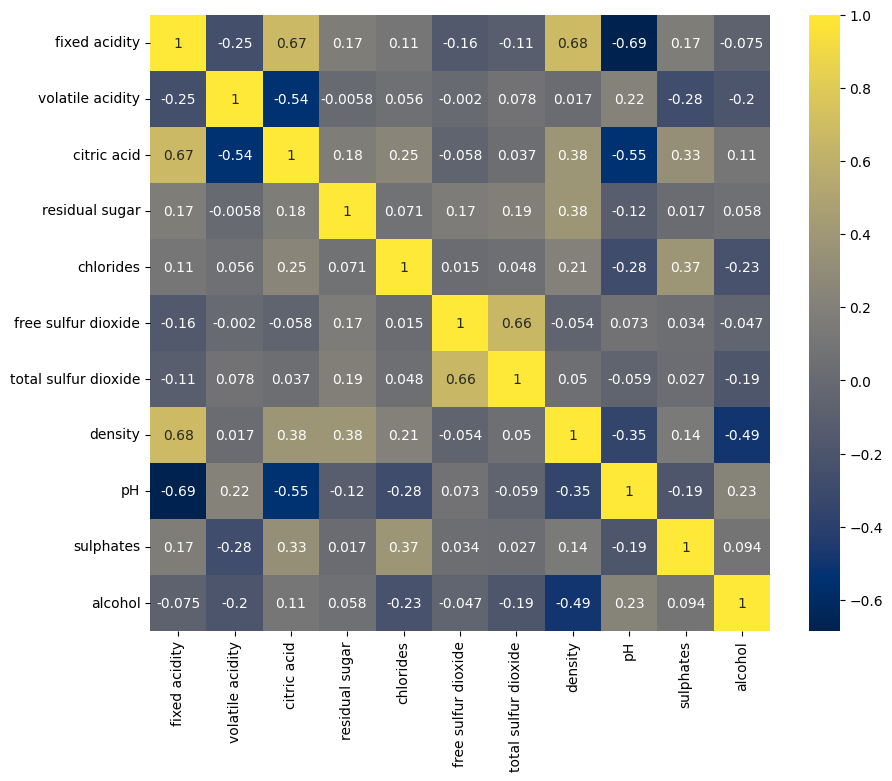

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='cividis')
plt.show()

##Split the Data for Train the Model & Initialize the Models

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SGD': SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),
    'SVC': SVC(kernel='linear', random_state=42)
}

##Train and Evaluate the models

In [14]:
for name, model in models.items():
    print(f'\n\033[1;4m{name}\033[0m') #bold and underlined the model names
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))


Random Forest
Accuracy: 0.6986899563318777
Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 28 65  6  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229


SGD
Accuracy: 0.5021834061135371
Confusion Matrix:
 [[ 0  0  0  0  0  0]
 [ 0  0  4  1  1  0]
 [ 1  0 77 13  5  0]
 [ 0  1 48 24 24  2]
 [ 0  0  5  7 14  0]
 [ 0  0  0  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

##Feature importance (Random Forest Model)

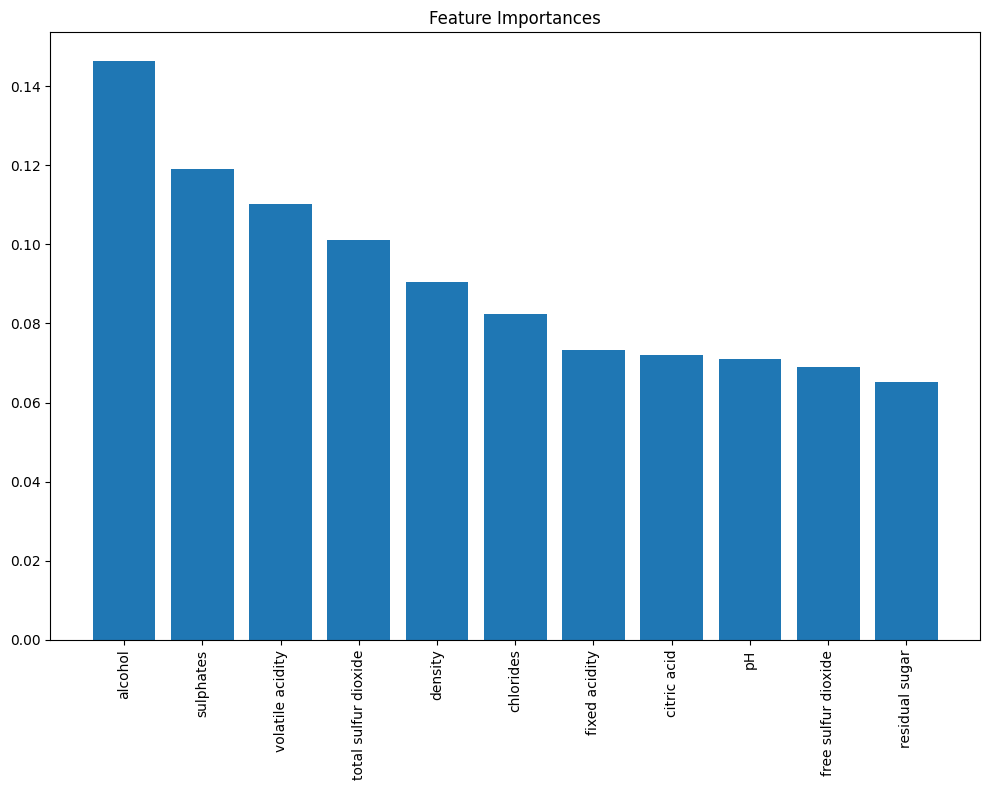

In [15]:
# Data Visualization
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the graph
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()